In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir(module_path)
os.getcwd()

'/Users/phuong/Documents/projects/CASED/my_projects/mlop_beta'

# activating package

In [2]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook

In [3]:
from mlop_beta.dataset_calling import load_data
from mlop_beta.data_explorer import discovery
from mlop_beta.feature_engineer import ft_engineer
from mlop_beta.classification import model_list, models_comparer
from mlop_beta.classification import create_model, tune_model
from mlop_beta.classification import classification_eval

# data load

In [4]:
dt = load_data()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


# EDA

In [27]:
discovery(data=dt, feature=dt.columns, label='default')

'EDA WITH TALE IS DONE'

# feature engineering

In [5]:
x_train, x_test, y_train, y_test = ft_engineer(data=dt, label='default',
                                               cat_var=[], features_to_drop=[],
                                               transform=True)


X train: (16800, 23)
y train: (16800,)
X test: (7200, 23)
y test: (7200,)


# model development

## spot check

Logistic: 0.716154 (0.019521)
RidgeClassifier: 0.714189 (0.019035)
LDA: 0.714346 (0.018769)
QDA: 0.721138 (0.015747)
SGDC: 0.702828 (0.017682)
time: 0.116996 mins


<IPython.core.display.Javascript object>


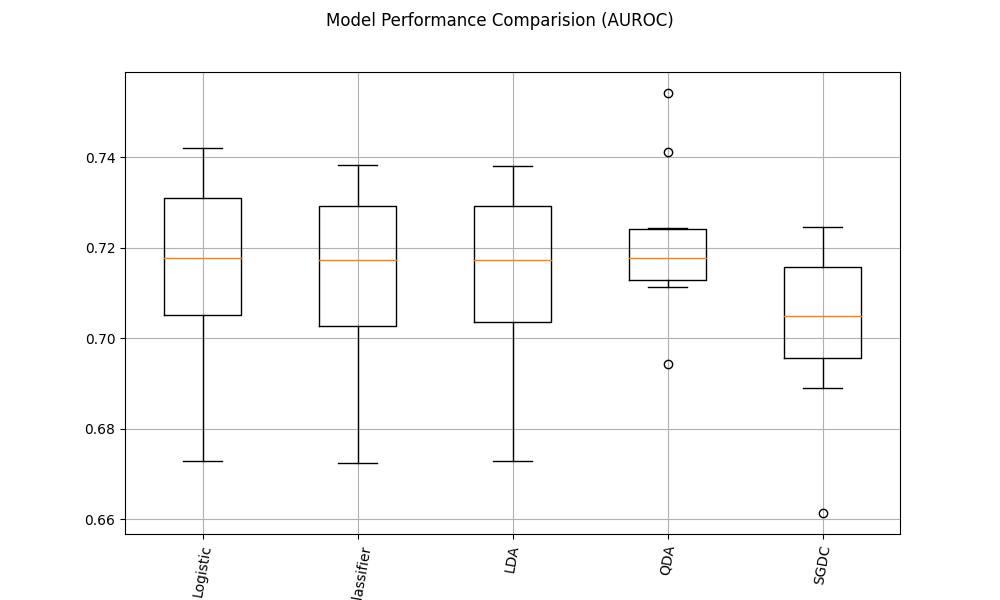

In [6]:
mod_list = model_list()
res, nam_model = models_comparer(list_of_model=mod_list, x=x_train, y=y_train)

pip install jupyter_contrib_nbextensions

jupyter contrib nbextension install --user


pip install jupyter_nbextensions_configurator


jupyter nbextensions_configurator enable --user

## selecting model

In [7]:
selected_mod = create_model(model_name='LogisticRegression', x=x_train, y=y_train)

,AUC
0,0.742084
1,0.672771
2,0.724415
3,0.736688
4,0.719276
5,0.715222
6,0.701829
7,0.733086
8,0.716258
9,0.699909


In [8]:
selected_mod

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## model tuning

In [9]:
tuned_lr = tune_model(model_name='LogisticRegression',
                      x_feat=x_train, y_target=y_train,
                      num_trial=10)

[I 2022-07-06 18:24:18,915] A new study created in memory with name: no-name-f03b785b-cf18-43fe-954c-bcbdc9cfc1f5
[I 2022-07-06 18:24:35,971] Trial 0 finished with value: 0.7200867878272627 and parameters: {'penalty': 'l1', 'C': 31.790527842111835}. Best is trial 0 with value: 0.7200867878272627.
[I 2022-07-06 18:24:47,357] Trial 1 finished with value: 0.7201503054235618 and parameters: {'penalty': 'l1', 'C': 57.46573593274779}. Best is trial 0 with value: 0.7200867878272627.
[I 2022-07-06 18:24:59,106] Trial 2 finished with value: 0.720162136837409 and parameters: {'penalty': 'l1', 'C': 75.90326331062376}. Best is trial 0 with value: 0.7200867878272627.
[I 2022-07-06 18:25:10,782] Trial 3 finished with value: 0.7197857859263481 and parameters: {'penalty': 'l1', 'C': 9.116394448433901}. Best is trial 3 with value: 0.7197857859263481.
[I 2022-07-06 18:25:21,418] Trial 4 finished with value: 0.7201015854700246 and parameters: {'penalty': 'l1', 'C': 34.25347753193358}. Best is trial 3 wit

The configuration of tuned model:
LogisticRegression(C=0.8926415582456894, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [10]:
tuned_lr

LogisticRegression(C=0.8926415582456894, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

# model inference

<IPython.core.display.Javascript object>


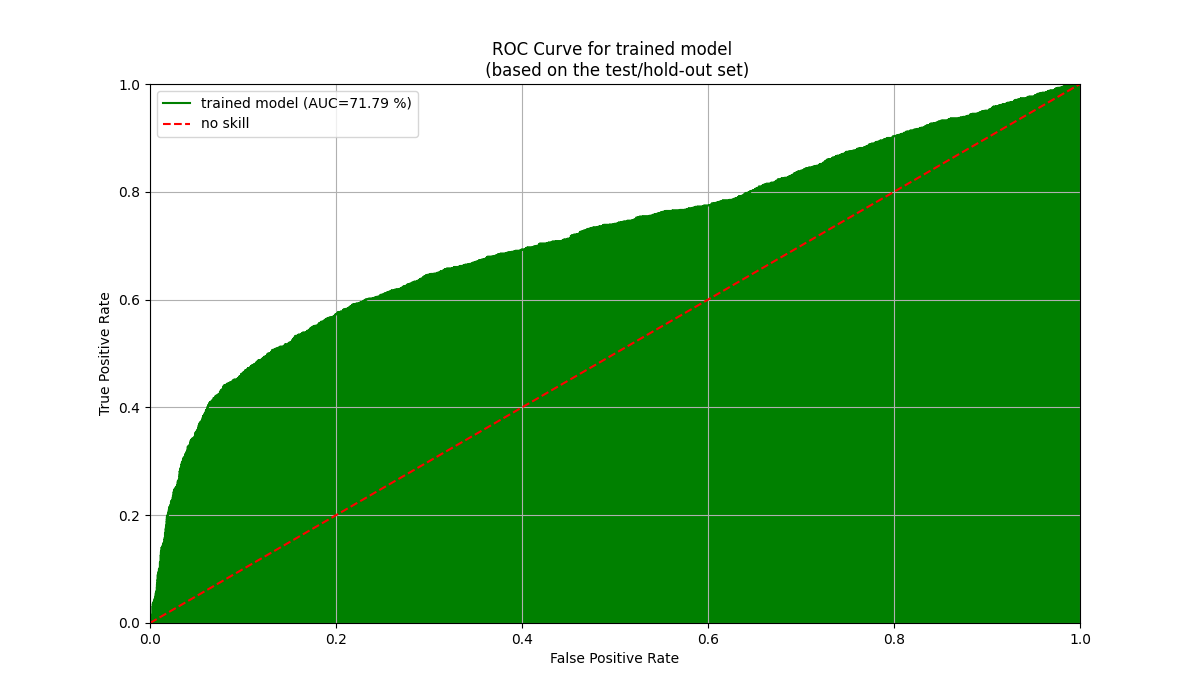

<IPython.core.display.Javascript object>


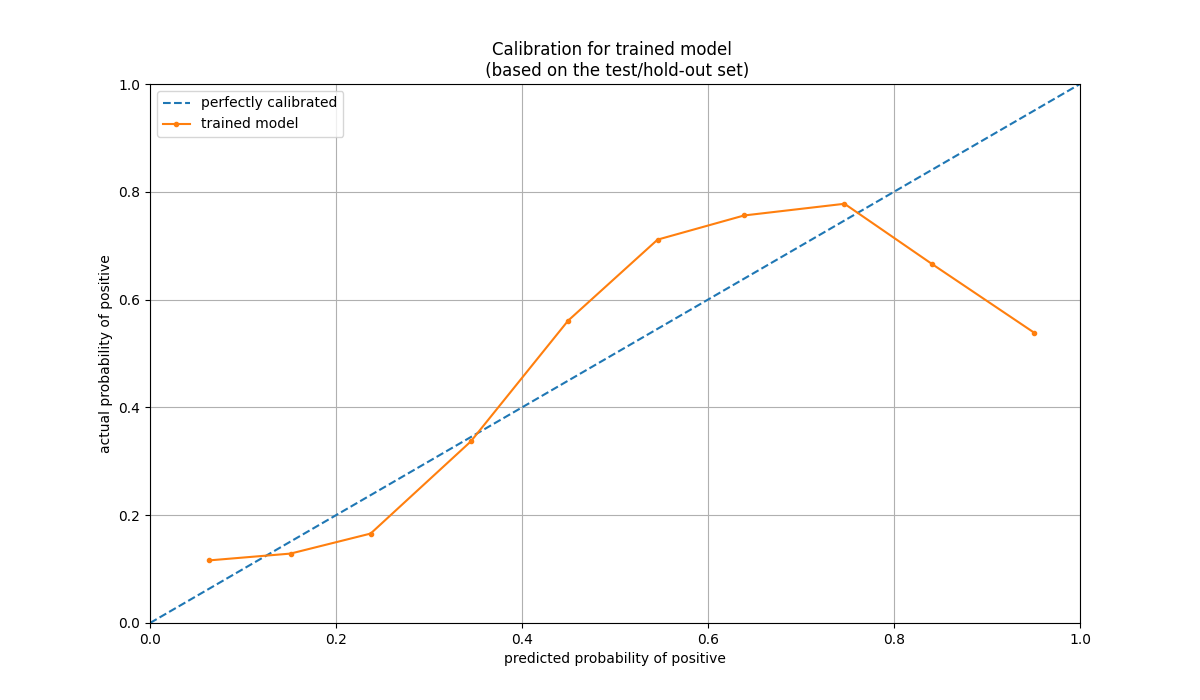

(0.7179382897114481,
 array([0.11612903, 0.128782  , 0.16591727, 0.33681462, 0.56091954,
        0.71126761, 0.75609756, 0.77777778, 0.66666667, 0.53846154]),
 array([0.06343807, 0.15108847, 0.23721095, 0.34493436, 0.44956112,
        0.54579207, 0.63881142, 0.74677379, 0.84032589, 0.95084458]))

In [11]:
classification_eval(xtest=x_test, ytest=y_test,trainedModel=tuned_lr)

In [55]:
import pickle
filename='model.pkl'
pickle.dump(tuned_lr, open(filename, 'wb'))

In [56]:
# Import libraries
import numpy as np
from flask import Flask, request, jsonify
import pickle
app = Flask(__name__)
# Load the model
model = pickle.load(open('model.pkl','rb'))
@app.route('/api',methods=['POST'])
def predict():
    # Get the data from the POST request.
    data = request.get_json(force=True)
    # Make prediction using model loaded from disk as per the data.
    prediction = model.predict([[np.array(data['exp'])]])
    # Take the first value of prediction
    output = prediction[0]
    return jsonify(output)
if __name__ == '__main__':
    app.run(port=5000, debug=True)

SystemExit: 1

In [7]:
import os
os.getcwd()

'/Users/phuong/Documents/projects/CASED/my_projects/mlop_beta'

In [4]:
from mlop_beta import image_upload

In [9]:
os.chdir('/Users/phuong/Documents/projects/CASED/my_projects/mlop_beta/mlop_beta')
os.getcwd()

'/Users/phuong/Documents/projects/CASED/my_projects/mlop_beta/mlop_beta'

In [10]:
!streamlit run image_upload.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.144.243:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            
^C
  Stopping...
